In [1]:
# Load in all dependencies and helper functions from the main folder
import sys
sys.path.append('..//')
from utils import *

Using TensorFlow backend.


GPU availbility: ['/job:localhost/replica:0/task:0/device:GPU:0']


In [3]:
image_folders = [IMG_PATH + n for n in os.listdir(IMG_PATH)]
image_folders[0]

'D:\\FramesDataset\\P_01'

In [4]:
dot_test_paths = []
for f in image_folders:
    dot_test_path = ''
    for subf in os.listdir(f):
        if subf.count('study-dot_test_final') > 0:
            dot_test_path = subf
    assert(dot_test_path != '')
    dot_test_paths.append(f + '\\' + dot_test_path)
dot_test_paths[0]

'D:\\FramesDataset\\P_01\\1491423217564_35_-study-dot_test_final.webm_frames'

In [5]:
all_csv = [[path+'\\'+f for f in os.listdir(path) if f.endswith('.csv')] for path in dot_test_paths]
all_csv = [i[0] for i in all_csv if len(i) > 0]

In [6]:
col_names = ['participant','frameImageFile','frameTimeEpoch','frameNum','mouseMoveX','mouseMoveY','mouseClickX','mouseClickY','keyPressed','keyPressedX','keyPressedY',\
             'tobiiLeftScreenGazeX','tobiiLeftScreenGazeY','tobiiRightScreenGazeX','tobiiRightScreenGazeY','webGazerX','webGazerY','clmPos','eyeFeatures']
clmPos = [['clmPos_'+str(i)+'_'+c for c in ['x', 'y']] for i in range(71)]
clmPos = [item for sub in clmPos for item in sub]
col_names = col_names[:-2] + clmPos + ['eyeFeatures_'+str(i) for i in range(120)]
print(list(col_names))

['participant', 'frameImageFile', 'frameTimeEpoch', 'frameNum', 'mouseMoveX', 'mouseMoveY', 'mouseClickX', 'mouseClickY', 'keyPressed', 'keyPressedX', 'keyPressedY', 'tobiiLeftScreenGazeX', 'tobiiLeftScreenGazeY', 'tobiiRightScreenGazeX', 'tobiiRightScreenGazeY', 'webGazerX', 'webGazerY', 'clmPos_0_x', 'clmPos_0_y', 'clmPos_1_x', 'clmPos_1_y', 'clmPos_2_x', 'clmPos_2_y', 'clmPos_3_x', 'clmPos_3_y', 'clmPos_4_x', 'clmPos_4_y', 'clmPos_5_x', 'clmPos_5_y', 'clmPos_6_x', 'clmPos_6_y', 'clmPos_7_x', 'clmPos_7_y', 'clmPos_8_x', 'clmPos_8_y', 'clmPos_9_x', 'clmPos_9_y', 'clmPos_10_x', 'clmPos_10_y', 'clmPos_11_x', 'clmPos_11_y', 'clmPos_12_x', 'clmPos_12_y', 'clmPos_13_x', 'clmPos_13_y', 'clmPos_14_x', 'clmPos_14_y', 'clmPos_15_x', 'clmPos_15_y', 'clmPos_16_x', 'clmPos_16_y', 'clmPos_17_x', 'clmPos_17_y', 'clmPos_18_x', 'clmPos_18_y', 'clmPos_19_x', 'clmPos_19_y', 'clmPos_20_x', 'clmPos_20_y', 'clmPos_21_x', 'clmPos_21_y', 'clmPos_22_x', 'clmPos_22_y', 'clmPos_23_x', 'clmPos_23_y', 'clmPos_24

In [7]:
def load_csv(idx):
    df = pd.read_csv(all_csv[idx], names = col_names)
    # Correcting for Window path
    df['frameImageFile'] = [IMG_PATH + '\\' + df['participant'][0] + '\\' + df['frameImageFile'][i][23:] for i in range(len(df))]
    return df
df = load_csv(37)
df.head()

,participant,frameImageFile,frameTimeEpoch,frameNum,mouseMoveX,mouseMoveY,mouseClickX,mouseClickY,keyPressed,keyPressedX,...,eyeFeatures_110,eyeFeatures_111,eyeFeatures_112,eyeFeatures_113,eyeFeatures_114,eyeFeatures_115,eyeFeatures_116,eyeFeatures_117,eyeFeatures_118,eyeFeatures_119
0,P_58,D:\FramesDataset\\P_58\1493212090222_20_-study...,1493213077186,0,"[0.3138888888888889, 0.30833333333333335, 0.30...","[0.6044444444444445, 0.5411111111111111, 0.418...","[0.3138888888888889, 0.23055555555555557]","[0.6044444444444445, 0.6144444444444445]",[],[],...,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.0,255.0,255.0
1,P_58,D:\FramesDataset\\P_58\1493212090222_20_-study...,1493213077222,1,[],[],[],[],[],[],...,255.00,255.00,255.00,255.00,85.00,21.25,0.00,255.0,255.0,255.0
2,P_58,D:\FramesDataset\\P_58\1493212090222_20_-study...,1493213077305,2,[],[],[],[],[],[],...,233.75,255.00,255.00,106.25,106.25,85.00,255.00,255.0,255.0,255.0
3,P_58,D:\FramesDataset\\P_58\1493212090222_20_-study...,1493213077305,3,[],[],[],[],[],[],...,127.50,191.25,212.50,63.75,85.00,42.50,233.75,255.0,255.0,255.0
4,P_58,D:\FramesDataset\\P_58\1493212090222_20_-study...,1493213077365,4,[],[],[],[],[],[],...,106.25,127.50,191.25,63.75,63.75,21.25,233.75,255.0,255.0,255.0


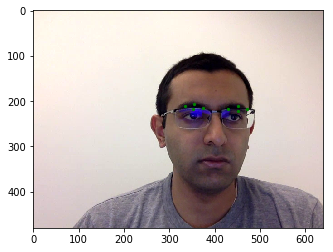

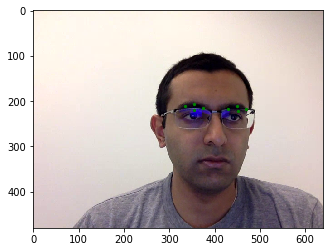

In [8]:
eye_box = [23,24,25,26,28,29,30,31]

for idx in range(40,42):
    img = Image.open(df['frameImageFile'][idx])
    plt.imshow(img)
    for i in eye_box:
        plt.scatter(df['clmPos_'+str(i)+'_x'][idx], df['clmPos_'+str(i)+'_y'][idx], s = 5, c = 'green')
    plt.show()

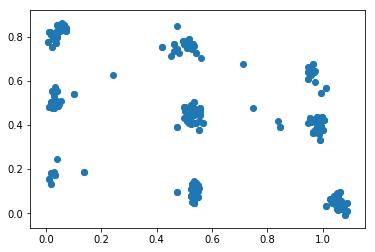

In [9]:
df = df[(df['tobiiLeftScreenGazeX'] > 0) & (df['tobiiRightScreenGazeX'] > 0)]
plt.scatter(df['tobiiLeftScreenGazeX'],df['tobiiLeftScreenGazeY'])

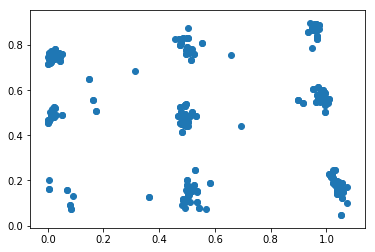

In [10]:
plt.scatter(df['tobiiRightScreenGazeX'],df['tobiiRightScreenGazeY'])

# Conclusion

The quality of the eye tracker is bad. Need to use something better for the eye features.